In [568]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [622]:
def plotdata(filename='./sim_perf.txt', ttl=''):
    sd = pd.read_csv(filename, sep=';')
    sd['loss'] = sd['loss'].astype(float)
    sd['epsilon'] = sd['epsilon'].astype(float)
    plt.figure(figsize=(16,8))
    plt.title(ttl)
    plt.plot(sd['epoch'], sd['loss'], c='red')
    plt.plot(sd['epoch'], sd['rouge'], c='blue')
    plt.plot(sd['epoch'], sd['epsilon'], c='gray')
    plt.ylim([0,1])
    plt.ylabel("Rouge, Loss, & Epsilon value")
    plt.xlabel("Training Epoch")
    plt.grid()
    plt.show()
    return sd

In [609]:
! th testHarness.lua --nepochs 1000 --gamma 0.8 --learning_rate 1e-4 --cuts 5 --n_rand 100 --edim 50 --mem_size 50

Running bag-of-words model	
TRUE {RECALL = 0.714286, PREC = 1.000000, F1 = 0.833333}	
{0,1,1,0,0,1,1,0,0,1,1,0} * Learned Actions	
{0,1,1,0,0,1,1,0,0,1,1,0} * Optimal Actions	
Model rouge = 0.833333; Best rouge = 0.833333; Ratio = 1.000000	


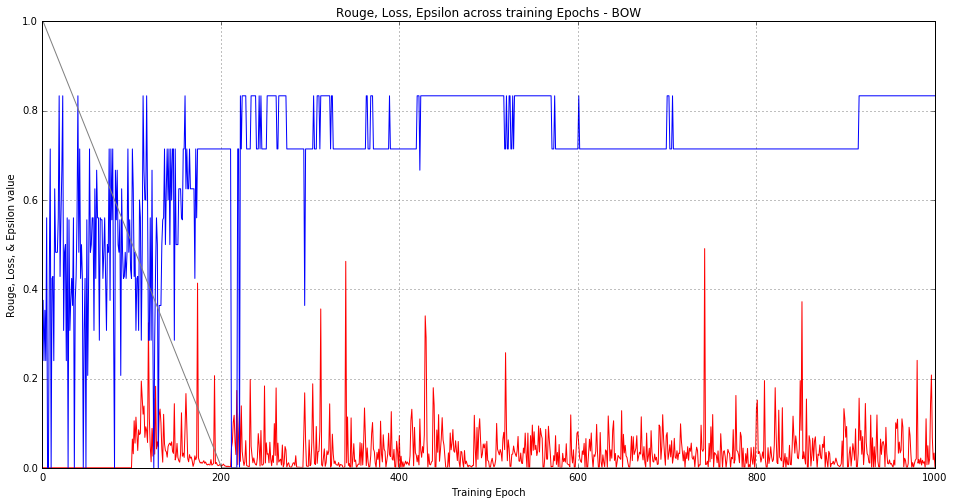

In [610]:
_ = plotdata('./sim_perf.txt','Rouge, Loss, Epsilon across training Epochs - BOW')

In [605]:
! th testHarness.lua --nepochs 1000 --gamma 0.8 --learning_rate 1e-4 --cuts 5 --n_rand 100 --edim 50 --mem_size 50 --nnmod 'lstm'

Running LSTM model	
TRUE {RECALL = 0.714286, PREC = 1.000000, F1 = 0.833333}	
{0,1,1,0,0,1,1,0,0,1,1,0} * Learned Actions	
{0,1,1,0,0,1,1,0,0,1,1,0} * Optimal Actions	
Model rouge = 0.833333; Best rouge = 0.833333; Ratio = 1.000000	


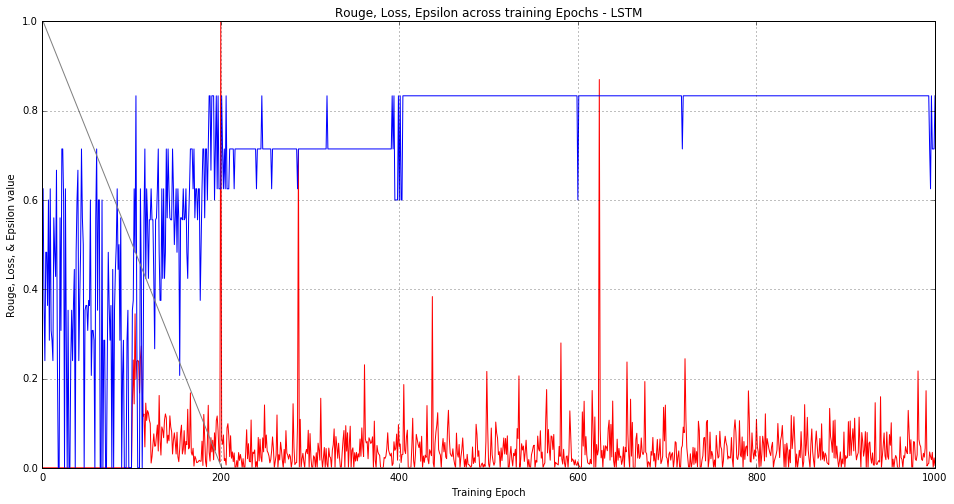

In [608]:
_ = plotdata('./sim_perf.txt', 'Rouge, Loss, Epsilon across training Epochs - LSTM')

# This is the model without memory and just backproping on all the examples

In [617]:
! th testHarness.lua --nepochs 1000 --gamma 0.8 --learning_rate 1e-4 --cuts 5 --n_rand 100 --edim 50 --mem_size 6

Running bag-of-words model	
TRUE {RECALL = 0.714286, PREC = 1.000000, F1 = 0.833333}	
{0,1,1,0,1,0,1,0,1,0,1,0} * Learned Actions	
{0,1,1,0,0,1,1,0,0,1,1,0} * Optimal Actions	
Model rouge = 0.352941; Best rouge = 0.833333; Ratio = 0.423529	


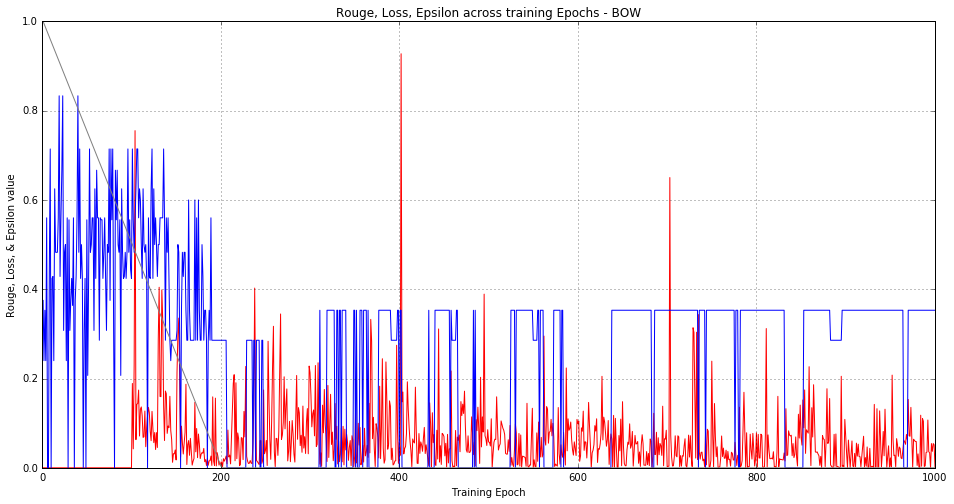

In [618]:
_ = plotdata('./sim_perf.txt', 'Rouge, Loss, Epsilon across training Epochs - BOW')

# Now trying it on real data

In [639]:
def plotdata(filename='./sim_perf.txt', ttl=''):
    sd = pd.read_csv(filename, sep=';')
    sd['loss'] = sd['loss'].astype(float)
    sd['epsilon'] = sd['epsilon'].astype(float)
    plt.figure(figsize=(16,8))
    plt.title(ttl)
    plt.plot(sd['epoch'], sd['loss'], c='red')
    plt.plot(sd['epoch'], sd['rouge'], c='blue')
#     plt.plot(sd['epoch'], sd['epsilon'], c='gray')
#     plt.ylim([0,1])
    plt.ylabel("Rouge, Loss, & Epsilon value")
    plt.xlabel("Training Epoch")
    plt.grid()
    plt.show()
    return sd

In [633]:
! time th testModel.lua --nepochs 500 --gamma 0.8 \
    --learning_rate 1e-4 --cuts 5 --n_rand 100 \
    --edim 100 --mem_size 1500 --usecuda

...Utils file loaded	
Running bag-of-words model	
...running on CPU	

real	20m45.388s
user	18m36.925s
sys	1m55.696s


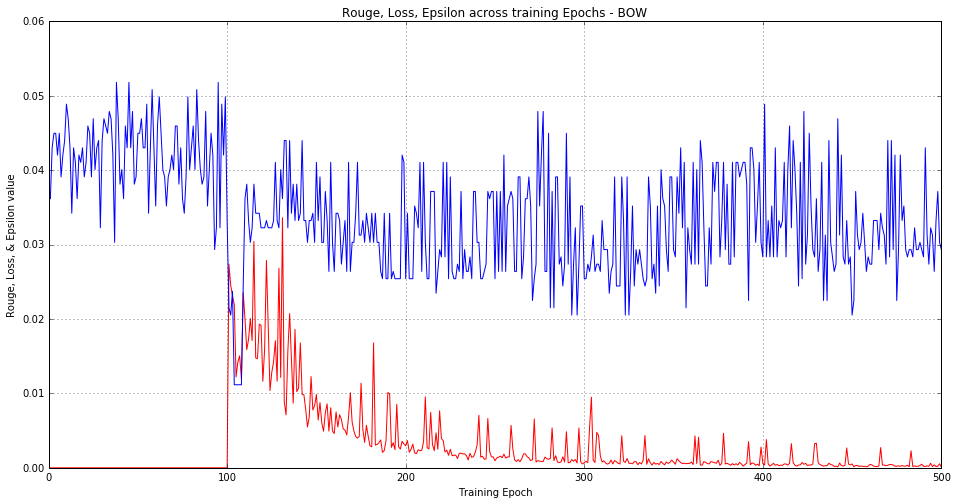

In [640]:
_ = plotdata('./perf.txt', 'Rouge, Loss, Epsilon across training Epochs - BOW')

In [644]:
! time th testModel.lua --nepochs 1000 --gamma 0.8 \
    --learning_rate 1e-4 --cuts 5 --n_rand 200 \
    --edim 200 --mem_size 2000

...Utils file loaded	
Running bag-of-words model	
...running on GPU	
/Users/franciscojavierarceo/torch/install/bin/luajit: ...ierarceo/torch/install/share/lua/5.1/nn/MaskedSelect.lua:18: invalid arguments: CudaTensor DoubleTensor CudaByteTensor 
expected arguments: [*CudaTensor*] CudaTensor CudaByteTensor
stack traceback:
	[C]: in function 'maskedSelect'
	...ierarceo/torch/install/share/lua/5.1/nn/MaskedSelect.lua:18: in function 'forward'
	testModel.lua:245: in function 'opfunc'
	...avierarceo/torch/install/share/lua/5.1/optim/rmsprop.lua:35: in function 'rmsprop'
	testModel.lua:254: in function 'backProp'
	testModel.lua:337: in main chunk
	[C]: in function 'dofile'
	...rceo/torch/install/lib/luarocks/rocks/trepl/scm-1/bin/th:145: in main chunk
	[C]: at 0x010d80cb90

real	12m29.762s
user	11m53.372s
sys	0m33.237s
